In [1]:
import sys
sys.path.insert(0, r'../../libraries/quetzal')
sys.path.insert(0, r'../../libraries/syspy')

from quetzal.io import  importer
from quetzal.model import stepmodel

import geopandas as gpd

In [2]:
training_folder = '../../'
input_folder = training_folder + r'gis/inputs/'

# rail

In [5]:
lines = gpd.read_file(input_folder+'sandbox_road.shp').set_index('id')

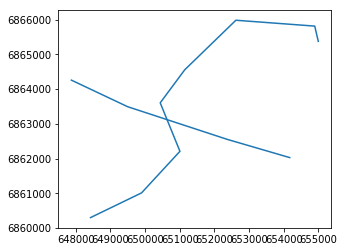

In [6]:
%matplotlib inline
lines.plot()

In [11]:
links, nodes = importer.from_lines(lines, add_return=False)

In [13]:
links['route_type'] = 1
links['route_color'] = "#D22328" # rouge systra
links['time'] = 150
sm = stepmodel.StepModel(epsg=2154, coordinates_unit='meter')
sm.links, sm.nodes = links, nodes

In [14]:
sm.to_hdf(training_folder + r'model/preparation/sandbox_rail.hdf')

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 22.83it/s]


# road

In [15]:
lines = gpd.read_file(input_folder+'sandbox_road.shp').set_index('id')
links, nodes = importer.from_lines(lines)
links['route_type'] = 3
links['route_color'] = "#D22328" # rouge systra
sm = stepmodel.StepModel(epsg=2154, coordinates_unit='meter')
sm.links, sm.nodes = links, nodes
sm.integrity_fix_collision()
sm.to_hdf(training_folder + r'model/preparation/sandbox_road.hdf')

can not add prefixes on table:  footpaths


to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 18.85it/s]


# JSON

In [20]:
sm.to_json(training_folder + r'model/last')

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 44.25it/s]
